# UNISACSI Exercises

This notebook contains a set of exercises to be used as alternative to the Matlab excercises from Jan Even. If you don't have any programming experience, I recommend you to stick to Matlab, as Jan Even spends more time on the basic concepts of programming in his lectures. This Python set of tasks is supposed to be an alternative for those of you who already have some experience with Python.

## Importing packages, setting paths, ...

As in every Python script, first import all packages needed for the following code:

In [1]:
import unisacsi.Ocean as Oc
import unisacsi.Meteo as Met
from unisacsi.MET_model_download import download_MET_model_static_fields, download_MET_model_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import gsw
import cmocean as cmo
import windrose
import xarray as xr
import seaborn as sns

Then, download the folder with the example and map data and save it locally on your computer. Then, specify this location here:

In [3]:
path_data = "/Users/lukasf/OneDrive - Universitetssenteret på Svalbard AS/unisacsi_example_data/"

Now you are ready to dive into the exercises! You might find some help and hints in the example notebook also available from the Github repository ;)

## CTD

### 1. CTD profiles

Some of the data you have gotten is CTD profiles from the AGF-214 cruise 2021. Read all profiles using the unisacsi-toolbox. Explore the dataset. In what type of variable are the profiles stored? Which sub-levels are there? Compare the temperature and salinity profiles from stations 3 and 23!

#### 1. Solution

CTD is a dictionary with one entry per station. The keys of CTD are the UNIS station numbers. Each profile in itself is a dictionary, with the individual variables as entries. Profile comparison: mixed layer depth, Billefjorden sill etc

dict_keys([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 157, 158, 159, 31, 160, 161, 162, 74, 163, 164, 315, 316, 317, 318, 319, 320, 321, 241, 32, 33, 988, 165, 34, 166, 167, 168, 70, 169, 170, 171, 35, 36, 37, 987, 38, 39, 172, 173, 174, 40, 62, 63, 64, 65, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 991, 501, 502, 503, 504, 505, 506, 507, 508, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 196, 195, 194, 193, 192, 191, 190, 206, 205, 204, 203, 202, 201, 200])
dict_keys(['P', 'D', 'T', 'C', 'OX', 'TURB', 'PAR', 'S', 'Tpot', 'OXsat', 'sbe_model', 'gps_datetime', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename', 'dnum', 'LAT', 'LON', 'z', 'BottomDepth', 'SA', 'CT', 'SIGTH', 'st', 'unis_st'])


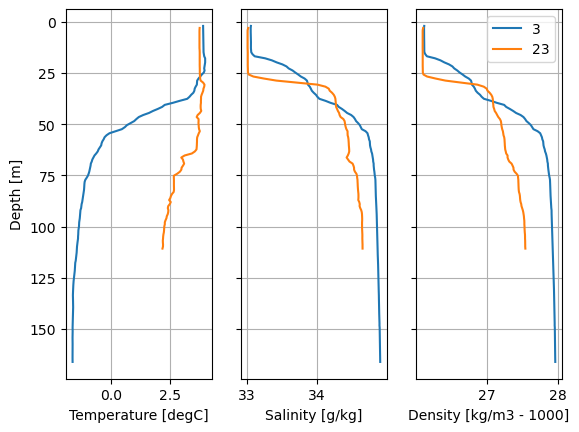

In [5]:
CTD = Oc.read_CTD(f"{path_data}CTD/")
print(CTD.keys())
print(CTD[12].keys())
stations_to_plot = [3,23]

fig, ax = plt.subplots(1,3,sharey=True)
for s, station in enumerate(stations_to_plot):
    ax[0].plot(CTD[station]['CT'],-CTD[station]['z'], color=f"C{s}")
    ax[1].plot(CTD[station]['SA'],-CTD[station]['z'], color=f"C{s}")
    ax[2].plot(CTD[station]['SIGTH'],-CTD[station]['z'],label=station, color=f"C{s}")
ax[0].invert_yaxis()
ax[0].set_xlabel("Temperature [degC]")
ax[1].set_xlabel("Salinity [g/kg]")
ax[2].set_xlabel('Density [kg/m3 - 1000]')
ax[0].set_ylabel('Depth [m]')
for a in ax:
    a.grid()
ax[2].legend()

### 2. CTD Section

Plot a CTD section containing the station numbers 1,3,6,10,12,18,23 for each of the variables (sometimes called CTD-transect; see the slide about CTD). Check the examples for already available functions for this task ;) Play around with the different argument options, e.g. for the interpolation! Can you put the two individual profiles from Exercise 1 into context?

#### Solution

(<AxesSubplot:xlabel='Distance [km]', ylabel='Depth [m]'>,
 <matplotlib.contour.QuadContourSet at 0x7fa408f659a0>)

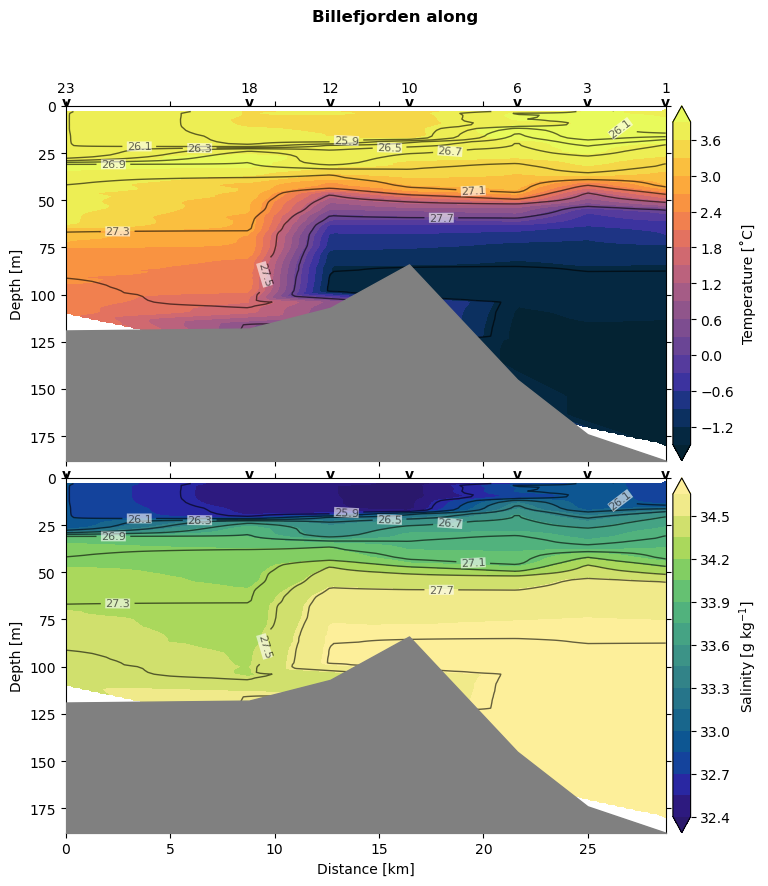

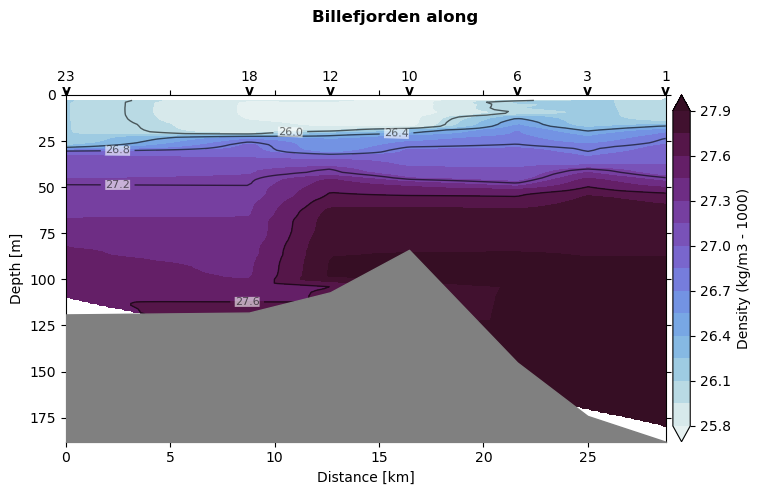

In [7]:
billefjorden_section = [23, 18, 12, 10, 6, 3, 1]
Oc.plot_CTD_section(CTD, billefjorden_section, section_name='Billefjorden along', interp_opt=1)
Oc.plot_CTD_single_section(CTD, billefjorden_section, parameter='SIGTH',
                               clabel='Density (kg/m3 - 1000)',
                              cmap='cmo.dense',section_name='Billefjorden along', interp_opt=1)

### 3. Mapping with Cartopy

Wouldn't it be nice to know, where these stations actually are located? Make a map with the locations of the Billefjorden along-fjord CTD stations using the CTD map toolbox function. Can you make a nicer map using the provided map data and the toolbox?

#### Solution

<a list of 919 text.Text objects>


/Users/lukasf/opt/anaconda3/envs/unisacsi/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


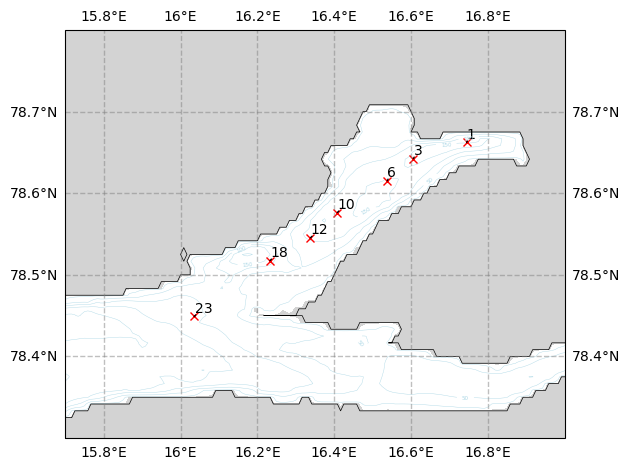

In [8]:
plt.figure()
Oc.plot_CTD_map(CTD, extent=[15.7,17.,78.3,78.8], stations=billefjorden_section, topography=f"{path_data}Svalbard_map_data/bathymetry_svalbard.mat",
                adjust_text=True)

/Users/lukasf/opt/anaconda3/envs/unisacsi/lib/python3.8/site-packages/rioxarray/raster_writer.py:110: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


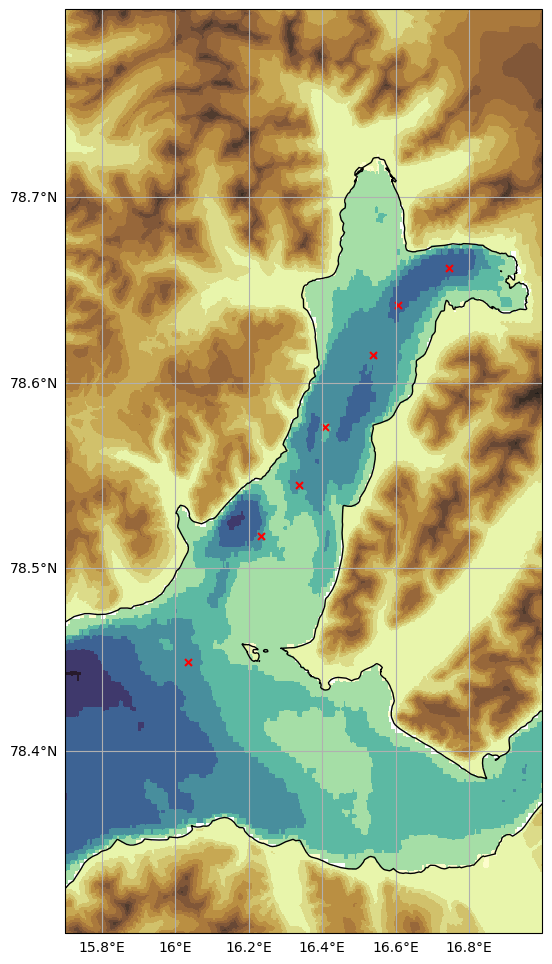

In [37]:
fig, ax = Met.initialize_empty_map(lat_limits=[78.3, 78.8], lon_limits=[15.7, 17.])
fig, ax = Met.map_add_coastline(fig, ax, option=1, color="k", lat_limits=[78.3, 78.8], lon_limits=[15.7, 17.], path_mapdata=f"{path_data}Svalbard_map_data/")
fig, ax = Met.map_add_bathymetry(fig, ax, option=1, color="k", resolution=50., lat_limits=[78.3, 78.8], lon_limits=[15.7, 17.], path_mapdata=f"{path_data}Svalbard_map_data/")
fig, ax = Met.map_add_topography(fig, ax, option=2, resolution=100., lat_limits=[78.3, 78.8], lon_limits=[15.7, 17.], path_mapdata=f"{path_data}Svalbard_map_data/")

bf_lats = [CTD[s]["LAT"] for s in billefjorden_section]
bf_lons = [CTD[s]["LON"] for s in billefjorden_section]
ax.scatter(x=bf_lons, y=bf_lats, s=25, c="r", marker="x", transform=ccrs.PlateCarree())

### 4. T-S Diagrams

A TS-diagram is an axis system with salinity on the x-axis and temperature on the y-axis. Since density depends mainly on temperature and salinity, a TS-diagram also gives background contours showing the density of water at any given point in this coordinate system. Pressure also affects density but is a chosen constant for the TS-plot. T-S diagrams are very useful to investigate e.g. the origin and interaction of water masses. Plot a "normal" T-S diagram of all stations in the Billefjorden section (one color for one station, use the respective toolbox-function). What do the density lines tell you about the properties of dense and light water masses? 
Which property determines the density most in cold waters? Plot the same T-S diagram again, but now with the Oxygen measurements color-coded.

#### Solution

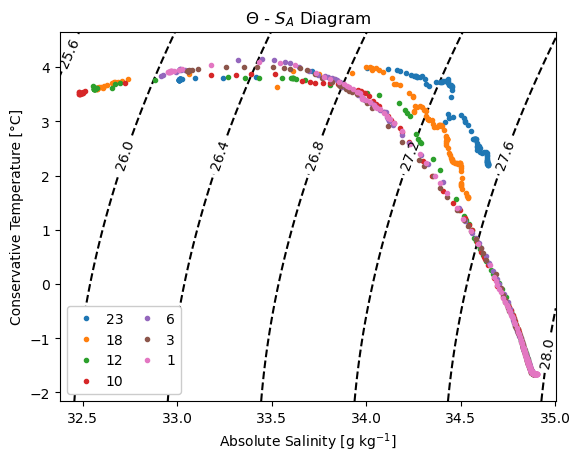

In [10]:
plt.figure()
Oc.plot_CTD_ts(CTD,billefjorden_section)

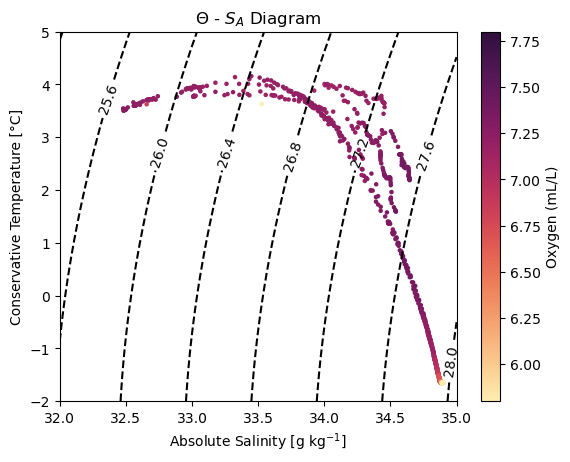

In [15]:
plt.figure()
Oc.create_empty_ts(T_extent=[-2., 5.],S_extent=[32.,35.])
for station in billefjorden_section:
    S = plt.scatter(CTD[station]['SA'],CTD[station]['CT'],
                s=5,c=CTD[station]['OX'],cmap='cmo.matter',
                   vmin=5.8,vmax=7.8)
plt.colorbar(S,label='Oxygen (mL/L)')

### 5. Wind Measurements

The Campbell AWS (Automatic Weather Station) measures wind speed and direction. You can find example data files in the respective folder. Read the data! Why are there two different files for the same period?

#### Solution

1s-files for wind (higher resolution for gusts), 10s-files for T and RH

In [18]:
help(Met.read_Campbell_AWS)
df_wind = Met.read_Campbell_AWS(f"{path_data}AWS_Campbell/1134_1_s*.dat", resolution="1_s")
print(df_wind.head())

Help on function read_Campbell_AWS in module unisacsi.Meteo:

read_Campbell_AWS(filename, resolution='1_s')
    Reads data from one or several data files from the Campbell AWS output files.
    Make sure to only specify files with the same temporal resolution.
    
    Parameters:
    -------
    filename: str
        String with path to file(s)
        If several files shall be read, specify a string including UNIX-style wildcards
    resolution: str
        String specifying the temporal resolution of the data
        1_s --> wind
        10_s --> T/RH
    Returns
    -------
    df : pandas dataframe
        a pandas dataframe with time as index and the individual variables as columns.

                     RECORD  VH1_mps  VR1_gr  VH2_mps  VR2_gr
TIMESTAMP                                                    
2022-09-12 14:07:29       7    0.392   298.7    0.980   305.1
2022-09-12 14:07:30       8    0.196   298.8    0.882   305.2
2022-09-12 14:07:31       9    0.000   298.8    0.980

### 6. Polar vs. Cartesian Data

The wind direction is given in compass directions (0-360 deg, 0 deg = North). Transform the direction and speed data from sensor 1 into u (east) and v (north) components. Always use pen and paper to work out the trigonometry first! And what kind of angles do Python’s trigonometric functions (e.g. sin and cos) accept, degrees or radians? Careful with the compass direction vs. the polar coordinate angle! Can you check your code by back-transforming u and v into speed and direction?!

#### Solution

                     RECORD  VH1_mps  VR1_gr  VH2_mps  VR2_gr         u  \
TIMESTAMP                                                                 
2022-09-18 06:59:56  492754    0.392   137.9    0.490   130.4 -0.262807   
2022-09-18 06:59:57  492755    0.392   137.9    0.490   130.4 -0.262807   
2022-09-18 06:59:58  492756    0.490   137.4    0.490   130.4 -0.331669   
2022-09-18 06:59:59  492757    0.490   137.4    0.588   130.4 -0.331669   
2022-09-18 07:00:00  492758    0.392   137.3    0.490   130.4 -0.265839   

                            v  wspeed_check  wdir_check  
TIMESTAMP                                                
2022-09-18 06:59:56  0.290855         0.392       137.9  
2022-09-18 06:59:57  0.290855         0.392       137.9  
2022-09-18 06:59:58  0.360688         0.490       137.4  
2022-09-18 06:59:59  0.360688         0.490       137.4  
2022-09-18 07:00:00  0.288087         0.392       137.3  


<AxesSubplot:xlabel='TIMESTAMP'>

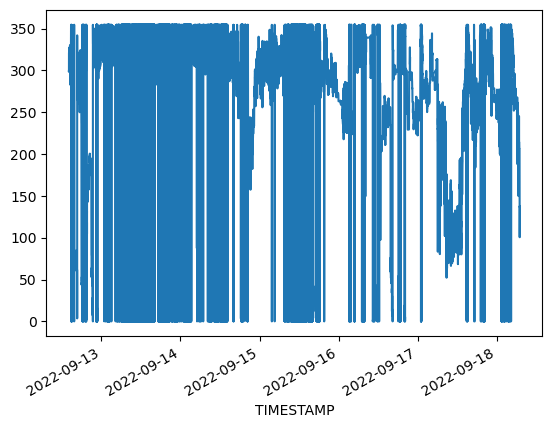

In [86]:
df_wind["u"] = -np.abs(df_wind["VH1_mps"]) * np.sin(np.deg2rad(df_wind["VR1_gr"]))
df_wind["v"] = -np.abs(df_wind["VH1_mps"]) * np.cos(np.deg2rad(df_wind["VR1_gr"]))

df_wind["wspeed_check"] = np.sqrt(df_wind["u"]**2. + df_wind["v"]**2.)
df_wind["wdir_check"] = (np.rad2deg(np.arctan2(-df_wind["u"], -df_wind["v"])) + 360.) % 360.

print(df_wind.tail())

### 7. Wind Rose

Make a wind rose plot of the time series. Why do we make such plots? What can they tell us? Make sure you get the degrees right and have north up in the plots.

#### Solution

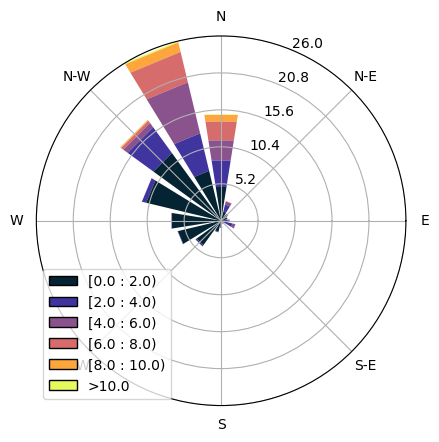

In [75]:
fig, ax = plt.subplots(1,1, subplot_kw={"projection": "windrose"})

ax.bar(df_wind["VR1_gr"], df_wind["VH1_mps"], bins=[0., 2., 4., 6., 8., 10.], normed=True, opening=0.8, cmap=cmo.cm.thermal)
ax.legend()

### 8. Wind time series

Plot time series of the wind measurements, both for each component and with a stickplot. Maybe it is wise to plot a smaller part of the series. Try!

#### Solution

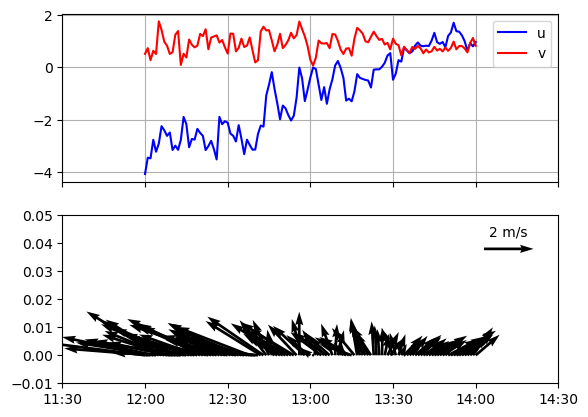

In [146]:
df = (df_wind["2022-09-17 12:00:00":"2022-09-17 14:00:00"]).resample('MIN').mean()

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df.index, df["u"], color="b", label="u")
ax[0].plot(df.index, df["v"], color="r", label="v")
ax[0].legend()
ax[0].grid()
q = ax[1].quiver(df.index, np.zeros_like(df["u"]), df["u"], df["v"], scale=20.)
plt.quiverkey(q,0.9,0.8,2.,'2 m/s',labelcolor='black')
ax[1].set_xlim([pd.Timestamp("2022-09-17 11:30:00"), pd.Timestamp("2022-09-17 14:30:00")])
ax[1].set_ylim([-0.01, 0.05])
ax[1].xaxis.set_major_formatter(mpl.dates.DateFormatter("%H:%M"))


### 9. Temperature & Humidity

In addition to the wind measurements, read also the air temperature and humidity measurements from the Campbell AWS. Make a time series plot for humidity and air temperature (sensor 1), two different variables with different units, in the same graph. Also add ylabels to both coordinate systems (i.e., sides) of the graph.

#### Solution

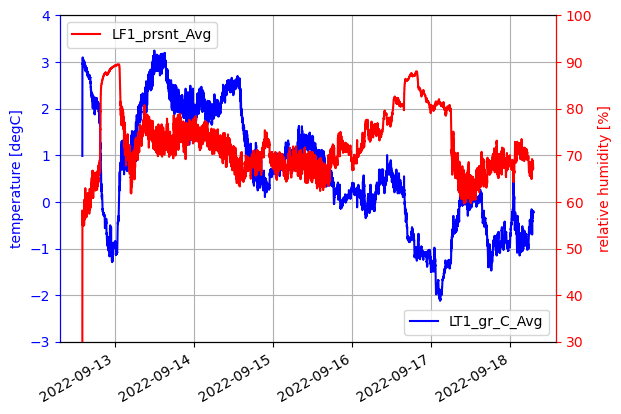

In [17]:
df_thermo = Met.read_Campbell_AWS(f"{path_data}AWS_Campbell/1134_10_s*.dat", resolution="10_s")

fig, ax_T = plt.subplots(1,1)
ax_RH = ax_T.twinx()
df_thermo.plot(y="LT1_gr_C_Avg", ax=ax_T, c="b")
df_thermo.plot(y="LF1_prsnt_Avg", ax=ax_RH, c="r")
ax_T.set_xlabel(None)
ax_T.set_ylabel("temperature [degC]", c="b")
ax_RH.set_ylabel("relative humidity [%]", c="r")
ax_RH.spines['left'].set_color('b')
ax_RH.spines['right'].set_color('r')
ax_T.set_ylim((-3., 4.))
ax_RH.set_ylim((30., 100.))
ax_T.tick_params(axis='y', colors="b", labelcolor="b")
ax_RH.tick_params(axis='y', colors="r", labelcolor="r")
ax_T.grid("both")
ax_T.legend(loc="lower right")
ax_RH.legend(loc="upper left")


### 10. Wind speed and direction

Plot also a time series plot of wind speed and wind direction. What about the line for direction? Is it making sense? Change the ‘linestyle’ to ‘none’ and add dots as ‘marker’ for the line! What about the wind direction y-axis ticks? Can you change the labels into "N", "NE", "E", etc?! Play around a bit with changing properties of lines and axes.

#### Solution

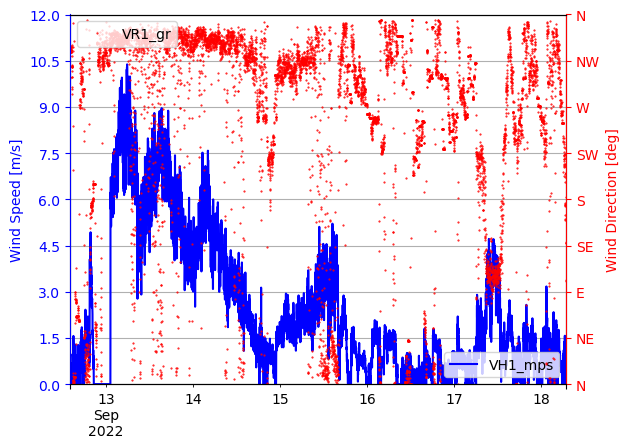

In [171]:
df = df_wind.resample('MIN').mean()

fig, ax_WS = plt.subplots(1,1)
ax_WD = ax_WS.twinx()
df.plot(y="VH1_mps", ax=ax_WS, c="b")
df.plot(y="VR1_gr", ax=ax_WD, c="r", marker=".", ms=1, ls="")
ax_WS.set_xlabel(None)
ax_WS.set_ylabel("Wind Speed [m/s]", c="b")
ax_WD.set_ylabel("Wind Direction [deg]", c="r")
ax_WD.spines['left'].set_color('b')
ax_WD.spines['right'].set_color('r')
ax_WS.set_ylim((0., 12.))
ax_WD.set_ylim((0., 360.))
ax_WS.set_yticks((0., 1.5, 3., 4.5, 6., 7.5, 9., 10.5, 12.))
ax_WD.set_yticks((0., 45., 90., 135., 180., 225., 270., 315., 360.))
ax_WD.set_yticklabels(("N", "NE", "E", "SE", "S", "SW", "W", "NW", "N"))
ax_WS.tick_params(axis='y', colors="b", labelcolor="b")
ax_WD.tick_params(axis='y', colors="r", labelcolor="r")
ax_WS.grid("both")
ax_WS.legend(loc="lower right")
ax_WD.legend(loc="upper left")

### 11. Combine time series data

Even though the temperature/humidity and wind measurements are initially sampled at different frequencies and read separately, it might be useful to combine them into one Dataframe. Find the respective pandas function and create a new dataframe with all measurements from 2022-09-14 as individual columns. How does the function handle the gaps in the temperature time series with respect to the wind measurements? Interpolate the temperature measurements onto the high temporal resolution.

#### Solution

In [31]:
df_AWS = pd.concat([df_wind["2022-09-14 00:00:00":"2022-09-14 23:59:59"], df_thermo["2022-09-14 00:00:00":"2022-09-14 23:59:59"]], axis=1)
df_AWS["LT1_gr_C_Avg"] = df_AWS["LT1_gr_C_Avg"].interpolate()

print(df_AWS["2022-09-14 06:10:00":"2022-09-14 06:10:32"])

                     VH1_mps  VR1_gr  VH2_mps  VR2_gr  Batt_V_Min  \
TIMESTAMP                                                           
2022-09-14 06:10:00    5.292   337.8    5.390   344.0       12.72   
2022-09-14 06:10:01    5.096   341.9    5.390   343.1         NaN   
2022-09-14 06:10:02    5.194   339.8    5.488   341.2         NaN   
2022-09-14 06:10:03    5.194   343.6    5.194   339.3         NaN   
2022-09-14 06:10:04    4.998   340.0    5.488   338.5         NaN   
2022-09-14 06:10:05    4.802   340.4    5.684   336.5         NaN   
2022-09-14 06:10:06    4.998   343.7    5.488   340.7         NaN   
2022-09-14 06:10:07    4.802   341.7    4.802   338.8         NaN   
2022-09-14 06:10:08    4.606   332.1    4.802   341.8         NaN   
2022-09-14 06:10:09    4.312   339.3    4.606   341.0         NaN   
2022-09-14 06:10:10    4.606   341.4    5.096   337.7       12.72   
2022-09-14 06:10:11    4.802   341.5    5.096   341.2         NaN   
2022-09-14 06:10:12    4.606   339

### 12. Modify dates and times

Tinytags are small and rugged temperature (and humidity) sensors we use in various settings to complement the full Campbell (or HOBO) weather stations. Read the example data file from TT6 using the toolbox. In what way are the time stamps in an inconvenient format? Fix the time series by interpolating it to a more convenient base! Furthermore, resample the time series to a 10-minute resolution! (Hint: pandas resample)

#### Solution

In [187]:
df_TT = Met.read_Tinytag(f"{path_data}TinyTags/20220917_TT6.txt", "TT")

df_TT_1min = df_TT.resample('min').interpolate('index')
df_TT_10min = df_TT_1min.resample("10min").mean()

                     RECORD  T_black_degC  T_white_degC
TIMESTAMP                                              
2022-09-14 07:40:00     2.0      6.860333      4.558333
2022-09-14 07:50:00     8.5      4.406900      5.341900
2022-09-14 08:00:00    18.5      5.823500      5.537100
2022-09-14 08:10:00    28.5      5.776900      5.227600
2022-09-14 08:20:00    38.5      5.747500      4.189900
...                     ...           ...           ...
2022-09-17 15:30:00  4788.5      3.067600      2.904200
2022-09-17 15:40:00  4798.5      2.776400      2.632000
2022-09-17 15:50:00  4808.5      3.071900      3.076900
2022-09-17 16:00:00  4818.5      3.052700      2.990200
2022-09-17 16:10:00  4828.0      2.964778      3.030889

[484 rows x 3 columns]


### 13. NetCDF files

NetCDF is an advanced form of data file that is widely used for large datasets. You can also choose to load smaller parts of the data arrays so that you do not fill up your workspace/memory unnecessarily. Here we are going to read some data from an atmosphere (weather) model, for the Svalbard region. NetCDF format lets you study the contents before loading. Use the xarray package to study the contents of all AROME-Arctic files. Study especially the dimensions and the different variables and coordinates. Load only the time period 2022-05-02 10:00:00 -- 2022-05-04 08:00:00. What are the units of the temperature and humidity variables? Maybe convert them? Use the toolbox to plot an overview over whole of Svalbard to check which area is covered by the dataset (plot the first time index of the surface geopotential devided by the gravitational constant, which variable is that?). Consider using the longitude and latitude as your x/y-coordinates. Extract the Billefjorden area from the whole dataset and plot the temperature field from 2022-05-03 05:00:00.

#### Solution

Text(0, 0.5, 'temperature [degC]')

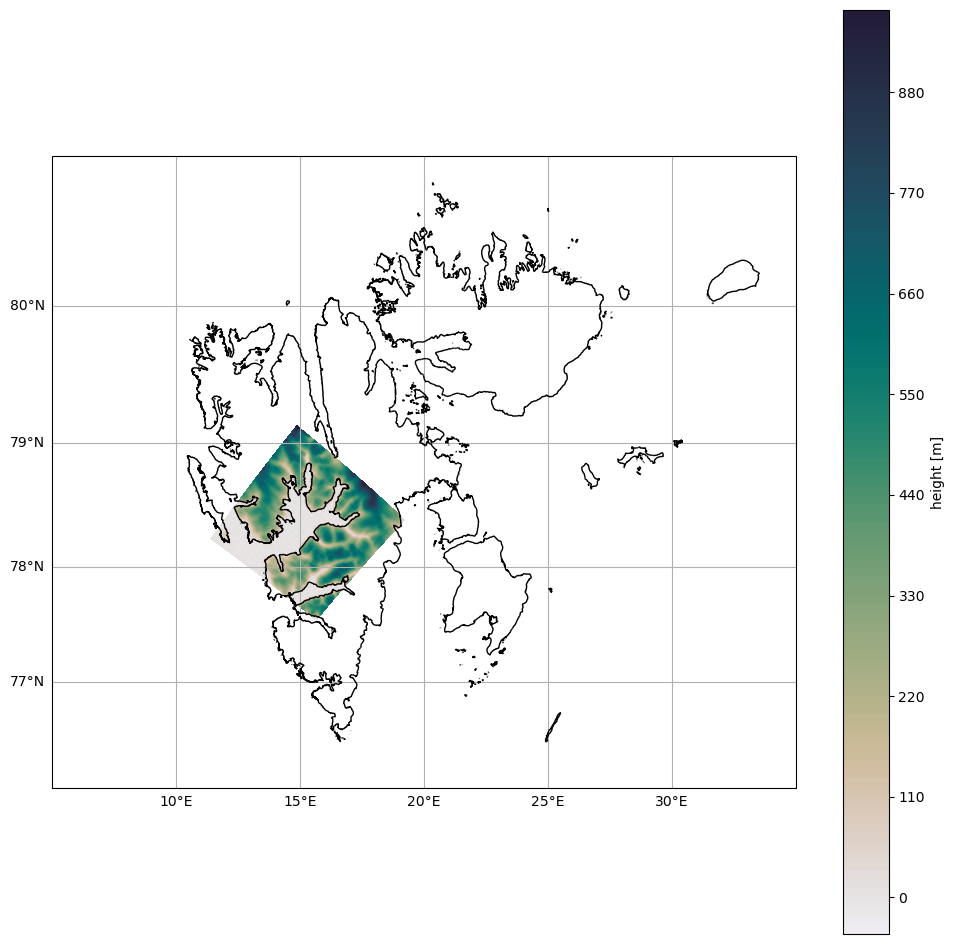

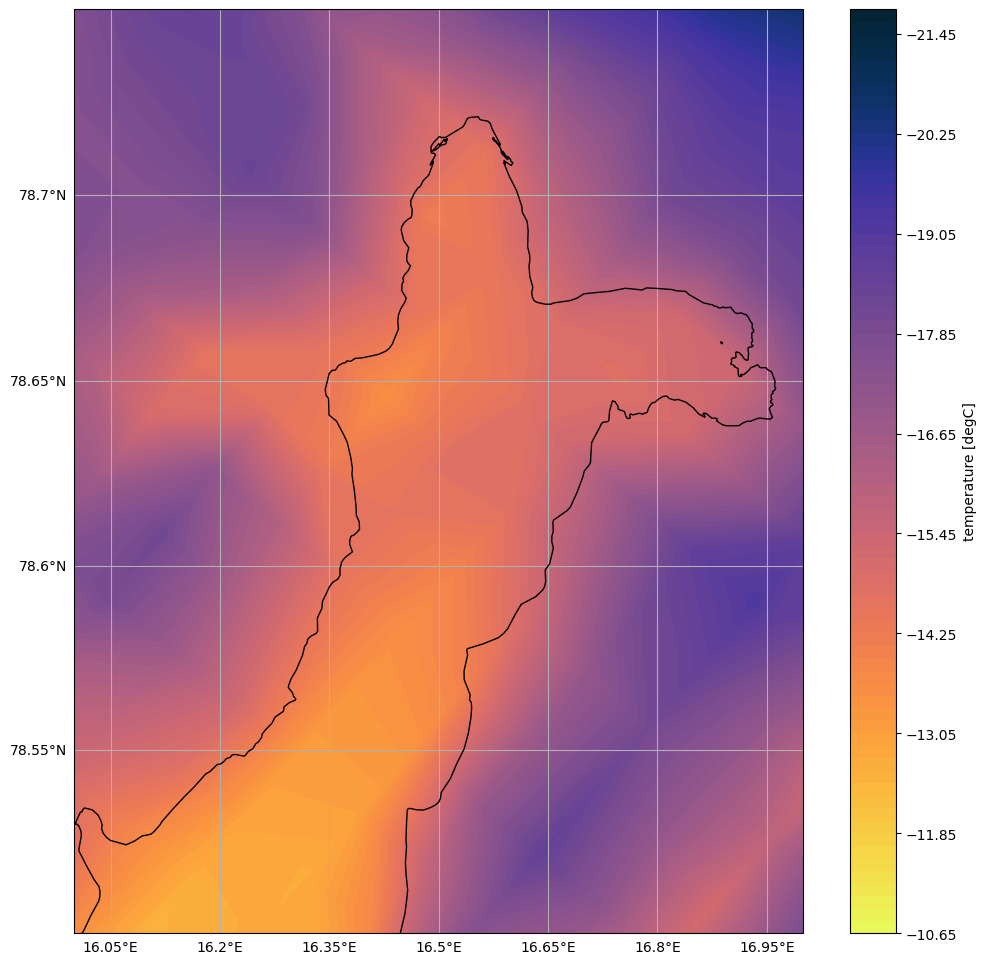

In [87]:
#with xr.open_mfdataset(f"{path_data}AROME_ARCTIC/AA_nearsurface_*.nc") as f:
#    print(f)
#    print(f.time)
    
with xr.open_mfdataset(f"{path_data}AROME_ARCTIC/AA_nearsurface_*.nc") as f:
    ds = f.sel(time=slice("2022-05-02 10:00:00", "2022-05-04 08:00:00")).load()
    
ds["air_temperature_2m"] -= 273.15
ds["relative_humidity_2m"] *= 100.
ds["specific_humidity_2m"] *= 1000.


fig, ax = Met.initialize_empty_map(lat_limits=[76., 81.], lon_limits=[5., 35.])
fig, ax = Met.map_add_coastline(fig, ax, option=1, color="k", lat_limits=[76., 81.], lon_limits=[5., 35.], path_mapdata=f"{path_data}Svalbard_map_data/")
pic = ax.contourf(ds.longitude, ds.latitude, ds.surface_geopotential.isel(time=0)/9.81, levels=100, cmap=cmo.cm.rain, transform=ccrs.PlateCarree())
cbar = plt.colorbar(pic, ax=ax)
cbar.ax.set_ylabel("height [m]")


ds_bf = ds.where((ds.longitude>15.) & (ds.longitude<18.) & (ds.latitude>78.3) & (ds.latitude<78.9), drop=True)

fig, ax = Met.initialize_empty_map(lat_limits=[78.5, 78.75], lon_limits=[16., 17.])
fig, ax = Met.map_add_coastline(fig, ax, option=1, color="k", lat_limits=[78.5, 78.75], lon_limits=[16., 17.], path_mapdata=f"{path_data}Svalbard_map_data/")
pic = ax.contourf(ds_bf.longitude, ds_bf.latitude, ds_bf.air_temperature_2m.sel(time="2022-05-03 05:00:00"), levels=100, cmap=cmo.cm.thermal, transform=ccrs.PlateCarree())
cbar = plt.colorbar(pic, ax=ax)
cbar.ax.set_ylabel("temperature [degC]")

### 14. Hovmöller Diagram

The example data folder contains one netCDF file with lidar wind profile measurements. Read the file and have a look at the different variables and their dimensions. Plot wind speed time series for the time period 2021-02-22 -- 2021-02-24 from the instrument "Windcube" (wc) for all height levels. Plot also a Hovmöller diagram for the whole time period.

#### Solution

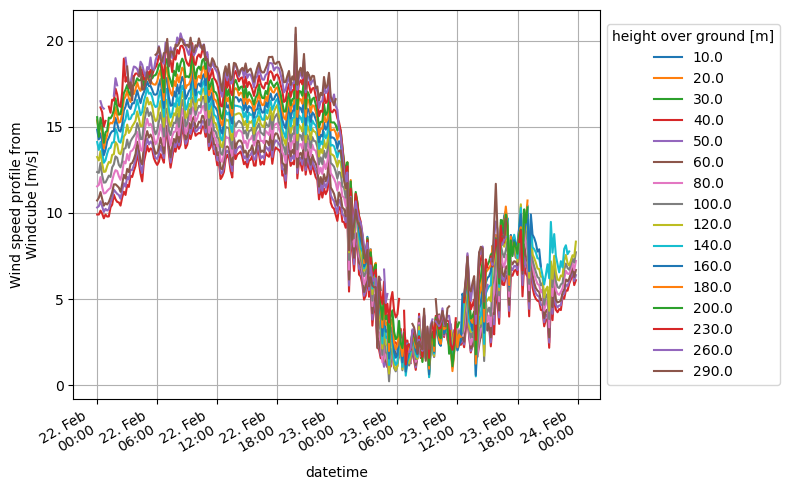

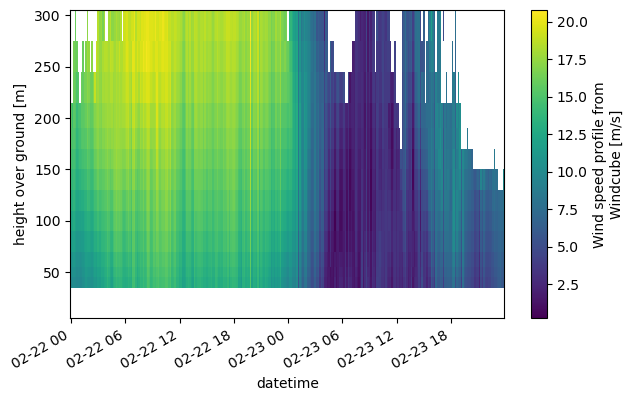

In [4]:
with xr.open_dataset(f"{path_data}Lidar/lidar_profiles_AeN.nc") as f:
    ds = f.sel(time=slice("2021-02-22", "2021-02-23")).load()
    
fig, ax = plt.subplots(figsize=(8,5))
ds.wc_wspeed.plot.line(ax=ax, x="time")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%d. %b\n%H:%M"))
ax.grid()
sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

fig, ax = plt.subplots(figsize=(7,4))
ds.wc_wspeed.plot.pcolormesh(x="time")

### 15. Averaging

Calculate average wind speed profiles for 2021-02-22 and 2021-02-23. Plot the individual wind profiles for the two days (two different colors). On top, add the average profiles for the two periods.

#### Solution

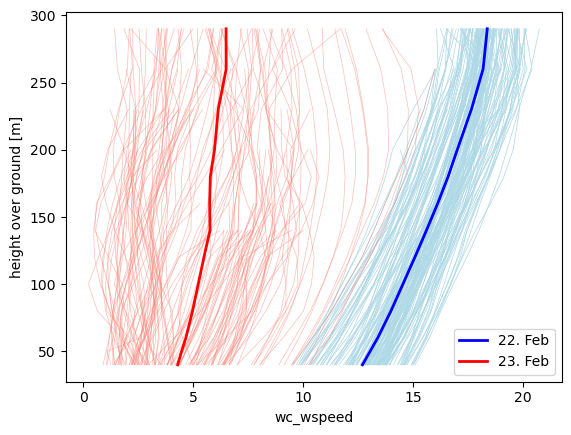

In [60]:
fig, ax = plt.subplots()
ds.wc_wspeed.sel(time=slice("2021-02-22 00:00:00", "2021-02-23 00:00:00")).plot.line(c="lightblue", lw=0.5, y="z", add_legend=False)
ds.wc_wspeed.sel(time=slice("2021-02-22 00:00:00", "2021-02-23 00:00:00")).mean("time").plot(c="b", lw=2, y="z", label="22. Feb")
ds.wc_wspeed.sel(time=slice("2021-02-23 00:00:00", "2021-02-24 00:00:00")).plot.line(c="salmon", alpha=0.5, lw=0.5, y="z", add_legend=False)
ds.wc_wspeed.sel(time=slice("2021-02-23 00:00:00", "2021-02-24 00:00:00")).mean("time").plot(c="r", lw=2, y="z", label="23. Feb")
ax.legend()

### 16. Download AROME-Arctic model data

You can download model data from AROME-Arctic using the toolbox. The configurations are set in an extra configuration file (also provided on github, will be introduced in class). Download the static fields from AROME-Arctic with a resolution of 2.5 km. Then download a time series (the last week) of temperature and wind data from the model grid point closest to Svalbard Airport. Compare against measurements (can be donwloaded manually from https://www.seklima.met.no and the resulting files can be read using the toolbox).

#### Solution

/Users/lukasf/Documents/GitHub/unisacsi/unisacsi/Meteo.py:55: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, dayfirst=True, sep=";", skipfooter=1, header=0, usecols=range(2,ncols+1), parse_dates=[0], decimal=",")


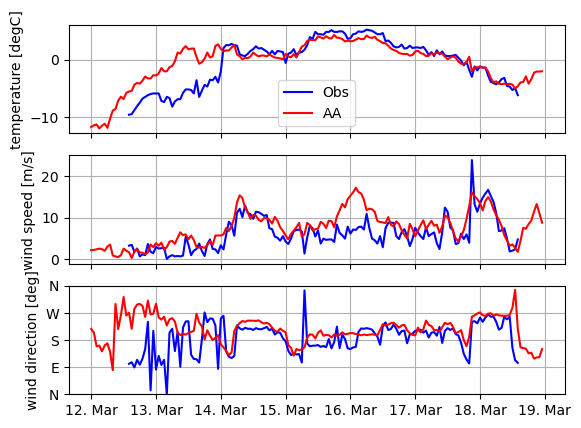

In [118]:
#download_MET_model_static_fields(f"{path_data}AROME_ARCTIC/config_model_download.yml")
#download_MET_model_data(f"{path_data}AROME_ARCTIC/config_model_download.yml")

df_meas = Met.read_MET_AWS(f"{path_data}AWS_MET/lyr_obs.csv")
ds_aa = Met.read_AROME(f"{path_data}AROME_ARCTIC/AA_timeseries_LYR_2p5km.nc")
ds_aa = ds_aa.squeeze()

fig, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(df_meas.index, df_meas["Lufttemperatur"], color="b", label="Obs")
ax[0].plot(ds_aa.time, ds_aa["air_temperature_2m"]-273.15, color="r", label="AA")
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel("temperature [degC]")
ax[1].plot(df_meas.index, df_meas["Middelvind"], color="b")
ax[1].plot(ds_aa.time, ds_aa["wind_speed_10m"], color="r")
ax[1].grid()
ax[1].set_ylabel("wind speed [m/s]")
ax[2].plot(df_meas.index, df_meas["Vindretning"], color="b")
ax[2].plot(ds_aa.time, ds_aa["wind_direction_10m"], color="r")
ax[2].grid()
ax[2].set_ylabel("wind direction [deg]")
ax[2].set_ylim((0., 360.))
ax[2].set_yticks((0., 90., 180., 270., 360.))
ax[2].set_yticklabels(["N", "E", "S", "W", "N"])
ax[2].xaxis.set_major_formatter(mpl.dates.DateFormatter("%d. %b"))